**1- Load and Visualize Audio Waveforms**

This section loads two audio files and visualizes their waveforms. Visualizing waveforms helps in understanding the general structure and amplitude variations of the audio signals.

In [11]:
import librosa
import librosa.display
import matplotlib.pyplot as plt


In [12]:
# Define paths to the audio files
audio_path_1 = '../../data/audio/friends_s01e01a_audio.mp3'
audio_path_2 = '../../data/audio/friends_s01e01b_audio.mp3'

# Load the audio files
y_1, sr_1 = librosa.load(audio_path_1)
y_2, sr_2 = librosa.load(audio_path_2)


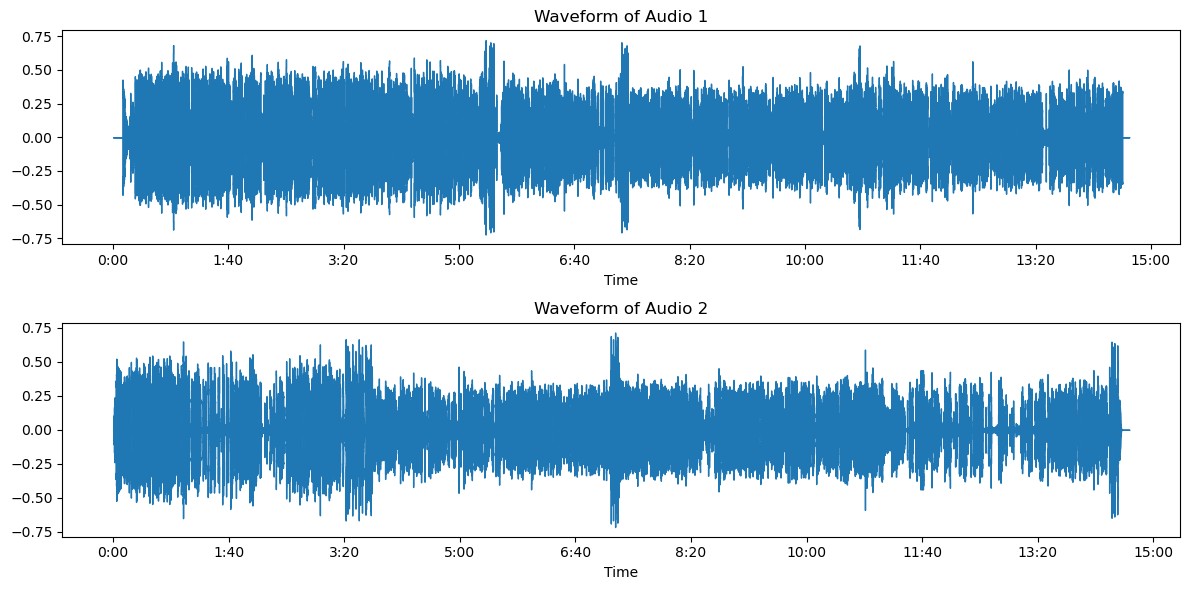

In [13]:
# Plot the waveform of the audio files
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
librosa.display.waveshow(y_1, sr=sr_1)
plt.title('Waveform of Audio 1')

plt.subplot(2, 1, 2)
librosa.display.waveshow(y_2, sr=sr_2)
plt.title('Waveform of Audio 2')

plt.tight_layout()
plt.show()

**2. Extract and Visualize MFCC Features**

This section extracts Mel-Frequency Cepstral Coefficients (MFCCs) from the audio files and visualizes them. MFCCs are useful features for audio analysis and are commonly used in tasks like speech and music recognition.

In [14]:
# Extract MFCC features from the audio files

mfcc_1 = librosa.feature.mfcc(y=y_1, sr=sr_1)
mfcc_2 = librosa.feature.mfcc(y=y_2, sr=sr_2)


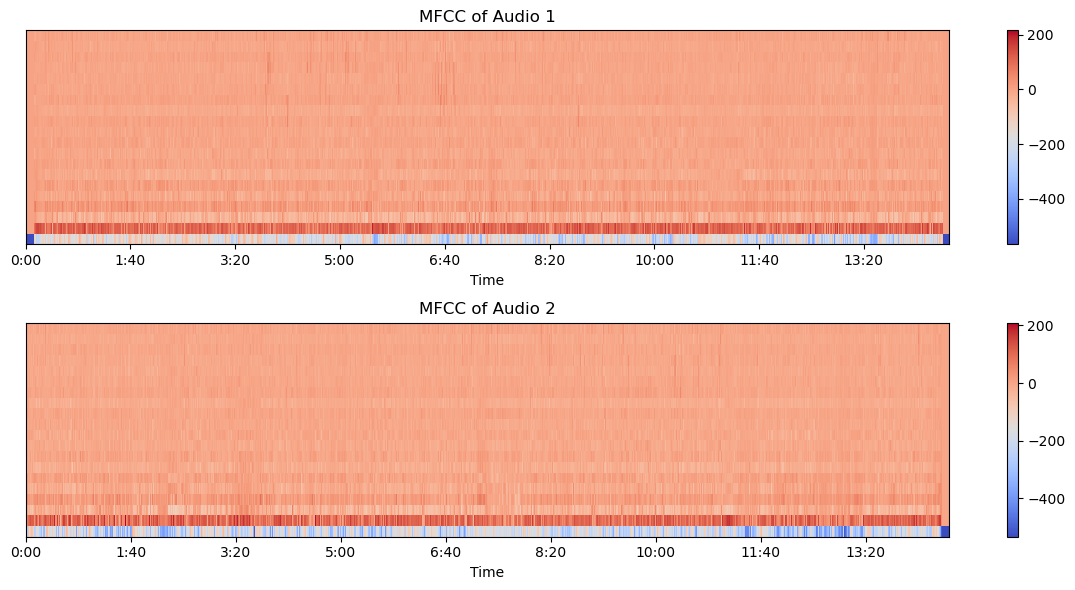

In [15]:
# Plot the MFCC features
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
librosa.display.specshow(mfcc_1, x_axis='time')
plt.colorbar()
plt.title('MFCC of Audio 1')

plt.subplot(2, 1, 2)
librosa.display.specshow(mfcc_2, x_axis='time')
plt.colorbar()
plt.title('MFCC of Audio 2')

plt.tight_layout()
plt.show()


**3. Detect and Analyze Non-Silent Audio Segments**

This section detects non-silent segments in an audio file and extracts features from these segments. The features include MFCCs, chroma, and spectral contrast. Visualizing these features for the first few segments helps in understanding the characteristics of different parts of the audio.

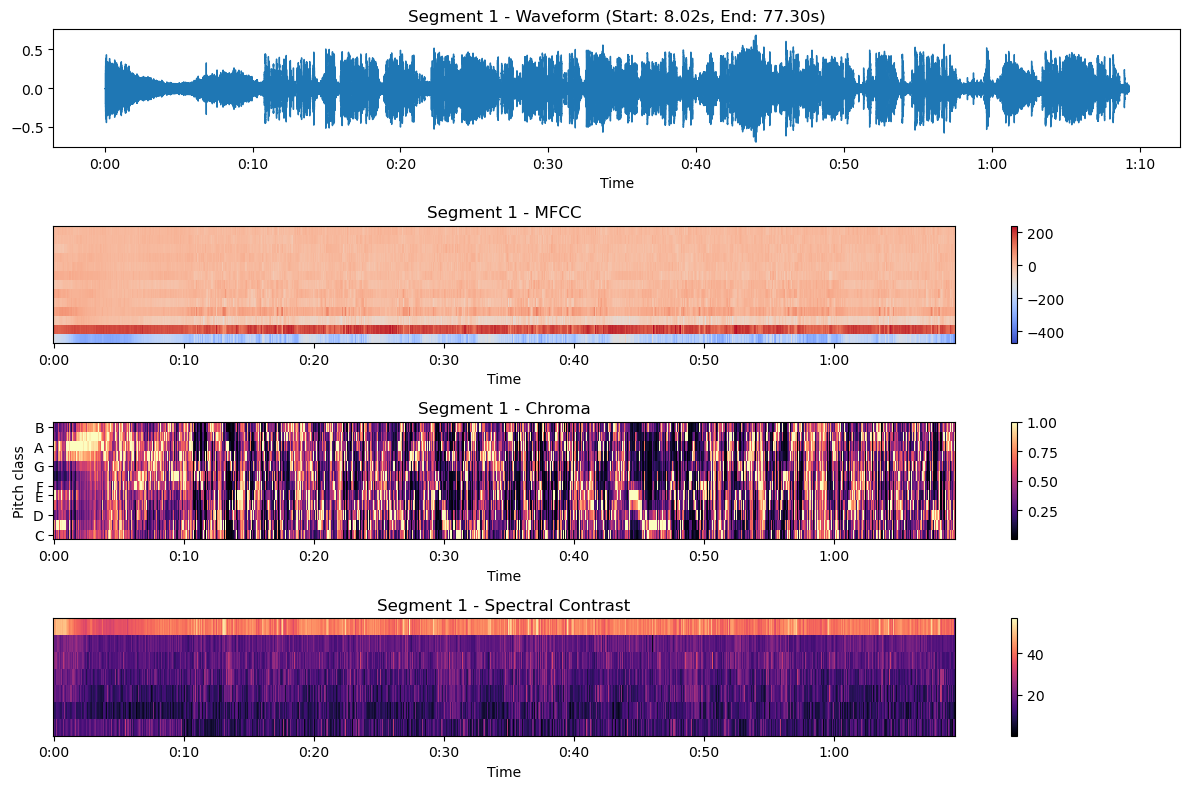

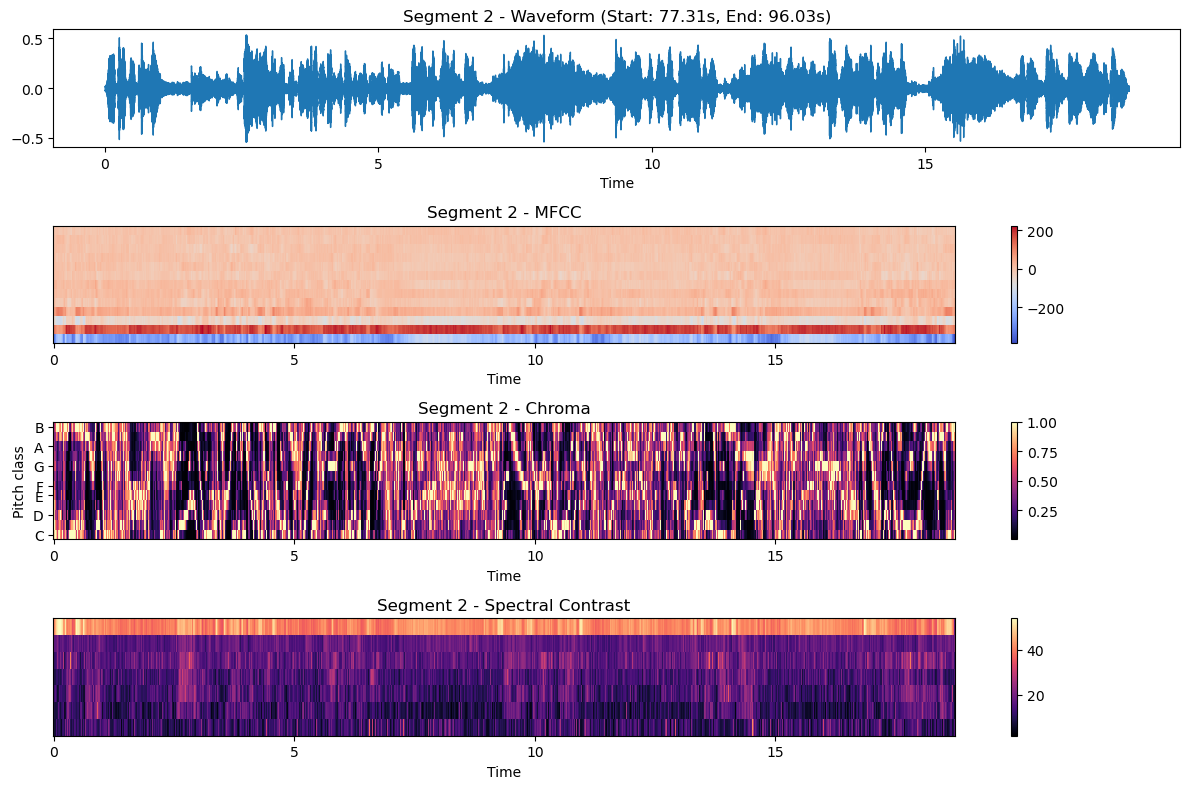

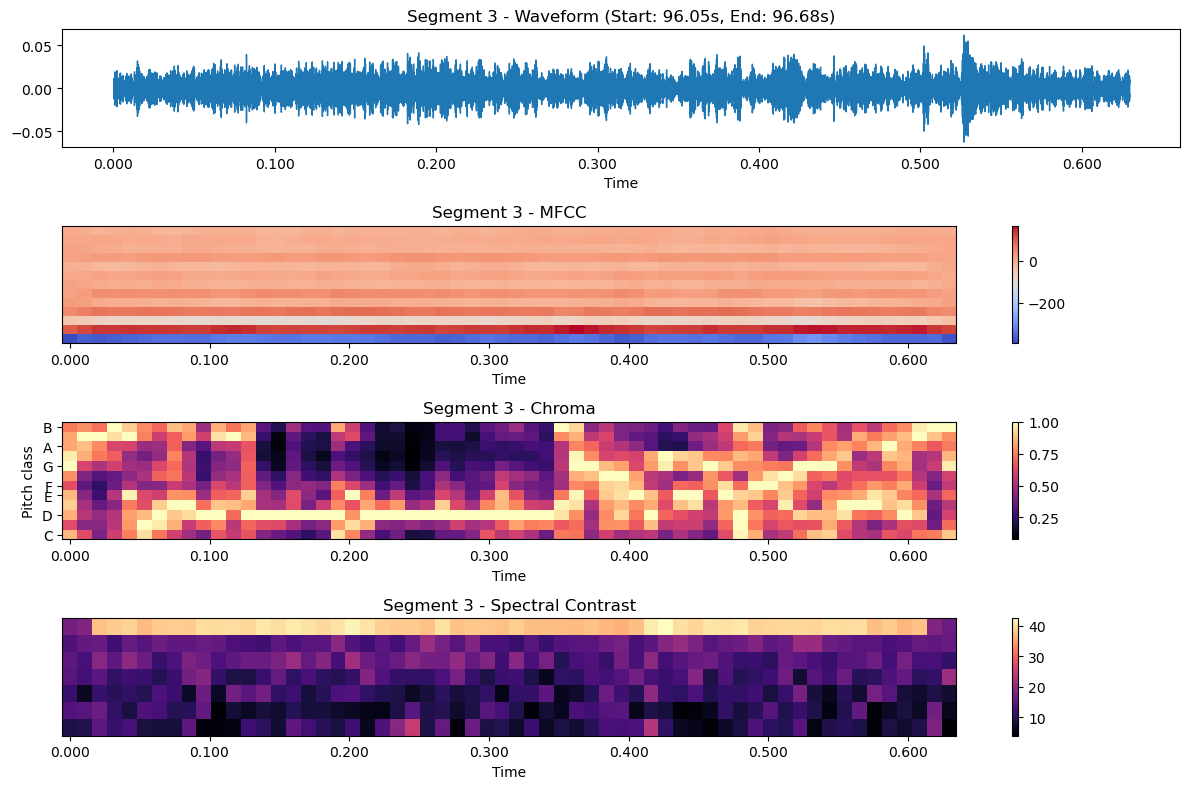

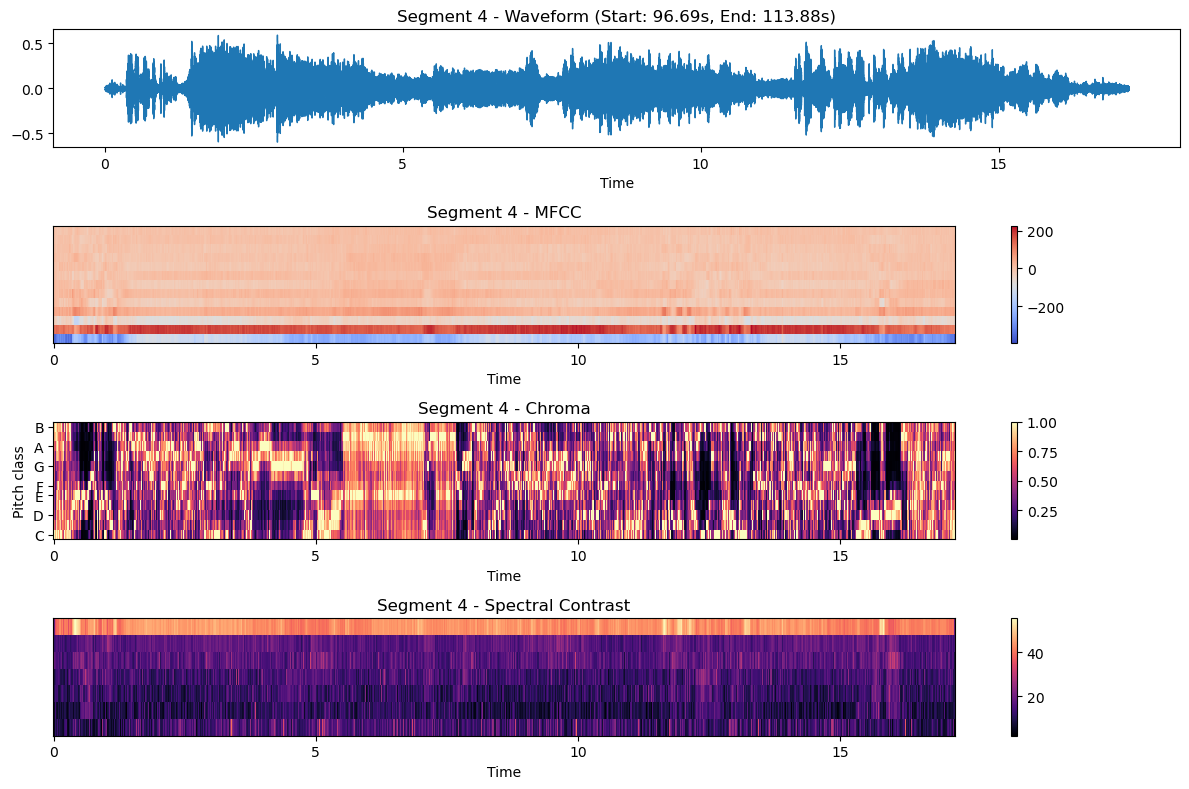

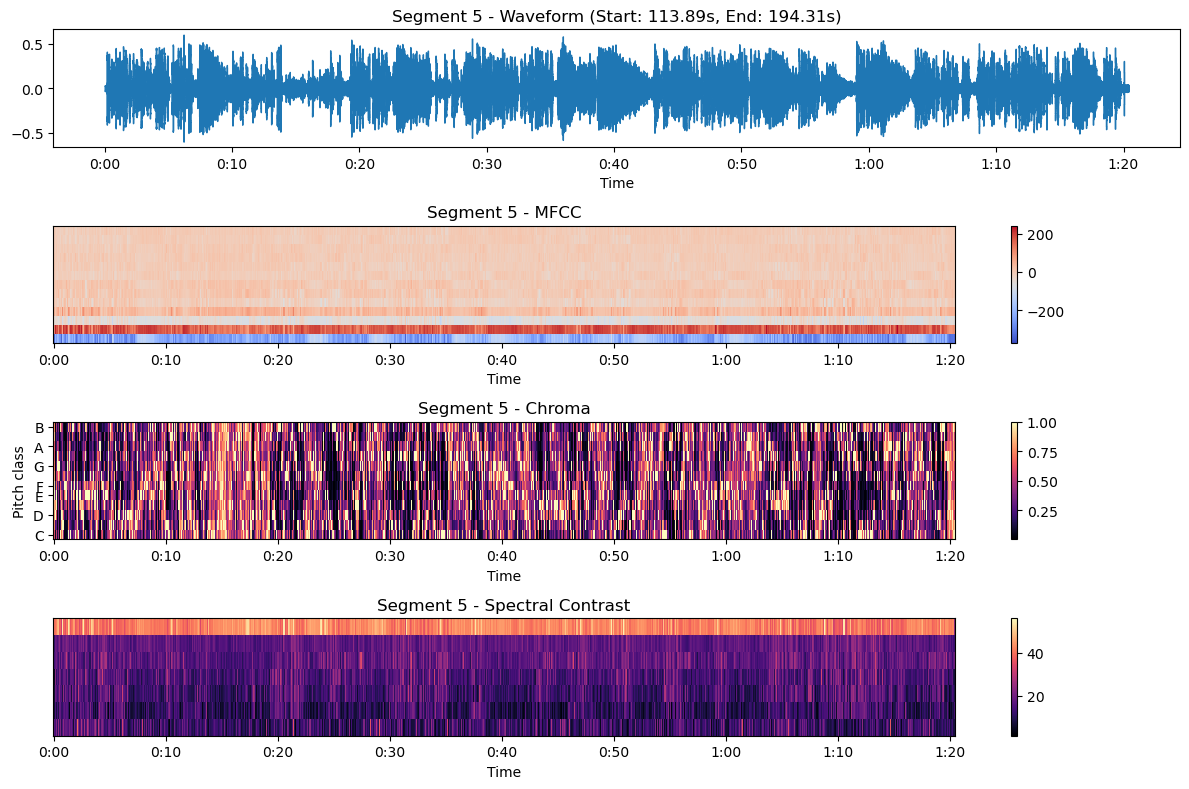

/home/katia/anaconda3/envs/bhack/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=512
  warnings.warn(
/home/katia/anaconda3/envs/bhack/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1024
  warnings.warn(
/home/katia/anaconda3/envs/bhack/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1536
  warnings.warn(
/home/katia/anaconda3/envs/bhack/lib/python3.10/site-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (275, 13) + inhomogeneous part.

In [16]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

# Define the directory containing the audio file
audio_dir = os.path.expanduser("~/Documents/BrainHack/BrainHack_projects/data/audio")
audio_file = os.path.join(audio_dir, "friends_s01e01a_audio.wav")

# Load the audio file
y, sr = librosa.load(audio_file, sr=None)

# Use librosa.effects.split to detect non-silent segments
non_silent_intervals = librosa.effects.split(y, top_db=30)

# Initialize lists to store features and segment information
segments = []
mfccs = []
chromas = []
spectral_contrasts = []

# Loop over each detected non-silent segment
for i, (start, end) in enumerate(non_silent_intervals):
    segment = y[start:end]
    
    # Extract features
    mfcc = librosa.feature.mfcc(y=segment, sr=sr, n_mfcc=13)
    chroma = librosa.feature.chroma_stft(y=segment, sr=sr)
    spectral_contrast = librosa.feature.spectral_contrast(y=segment, sr=sr)

    # Store segment and features
    segments.append((segment, start, end))
    mfccs.append(mfcc)
    chromas.append(chroma)
    spectral_contrasts.append(spectral_contrast)

    # Plot the waveform and features for the first few segments
    if i < 5:
        plt.figure(figsize=(12, 8))
        
        # Plot the waveform
        plt.subplot(4, 1, 1)
        librosa.display.waveshow(segment, sr=sr)
        plt.title(f'Segment {i+1} - Waveform (Start: {start/sr:.2f}s, End: {end/sr:.2f}s)')
        
        # Plot MFCCs
        plt.subplot(4, 1, 2)
        librosa.display.specshow(mfcc, sr=sr, x_axis='time')
        plt.colorbar()
        plt.title(f'Segment {i+1} - MFCC')
        
        # Plot Chroma
        plt.subplot(4, 1, 3)
        librosa.display.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma')
        plt.colorbar()
        plt.title(f'Segment {i+1} - Chroma')
        
        # Plot Spectral Contrast
        plt.subplot(4, 1, 4)
        librosa.display.specshow(spectral_contrast, sr=sr, x_axis='time')
        plt.colorbar()
        plt.title(f'Segment {i+1} - Spectral Contrast')
        
        plt.tight_layout()
        plt.show()

# Convert feature lists to numpy arrays for further processing if needed
mfccs = np.array(mfccs)
chromas = np.array(chromas)
spectral_contrasts = np.array(spectral_contrasts)

print("Feature extraction completed.")
segment = librosa.util.fix_length(segment, desired_length)

In [17]:
import os
import json  # Import the json module

# Define the directory containing the JSON files and the JSON file path
json_dir = os.path.expanduser("~/Documents/BrainHack/BrainHack_projects/data/json/json_aa/json_aa")
json_file = os.path.join(json_dir, "friends_s01e01a_aa.json")

# Load the JSON file
with open(json_file, 'r') as file:
    data = json.load(file)


In [18]:
data.keys()

dict_keys(['results'])

In [19]:
data["results"]["channels"][0]['alternatives'][0]["words"]

[{'word': "There's", 'start': 18.97, 'end': 19.146, 'confidence': 0.6398},
 {'word': 'nothing', 'start': 19.178, 'end': 19.422, 'confidence': 0.99923},
 {'word': 'to', 'start': 19.476, 'end': 19.646, 'confidence': 1.0},
 {'word': 'tell.', 'start': 19.668, 'end': 20.24, 'confidence': 0.99896},
 {'word': 'Just', 'start': 20.85, 'end': 21.262, 'confidence': 0.5221},
 {'word': 'some', 'start': 21.316, 'end': 21.534, 'confidence': 0.99967},
 {'word': 'guy', 'start': 21.572, 'end': 21.726, 'confidence': 0.99993},
 {'word': 'I', 'start': 21.748, 'end': 21.886, 'confidence': 1.0},
 {'word': 'work', 'start': 21.908, 'end': 22.142, 'confidence': 0.77104},
 {'word': 'with.', 'start': 22.196, 'end': 22.75, 'confidence': 0.99895},
 {'word': 'Come', 'start': 22.9, 'end': 23.262, 'confidence': 0.99886},
 {'word': 'on,', 'start': 23.316, 'end': 23.774, 'confidence': 0.99997},
 {'word': "you're", 'start': 23.892, 'end': 24.314, 'confidence': 0.76648},
 {'word': 'going', 'start': 24.362, 'end': 24.526, 

In [20]:
y, sr = librosa.load(audio_file, sr=None)
sr

48000

**the audio signal has been sampled 48000 times per second to represent the sound. A higher sampling rate generally results in better audio quality and captures more details in the sound wave, but it also requires more storage space.**

**4. Segment Audio Based on Transcript**

This section segments an audio file based on word-level timestamps from a transcript JSON file. It extracts and stores audio segments corresponding to individual words, limited to a specified number of words (100 in this case).

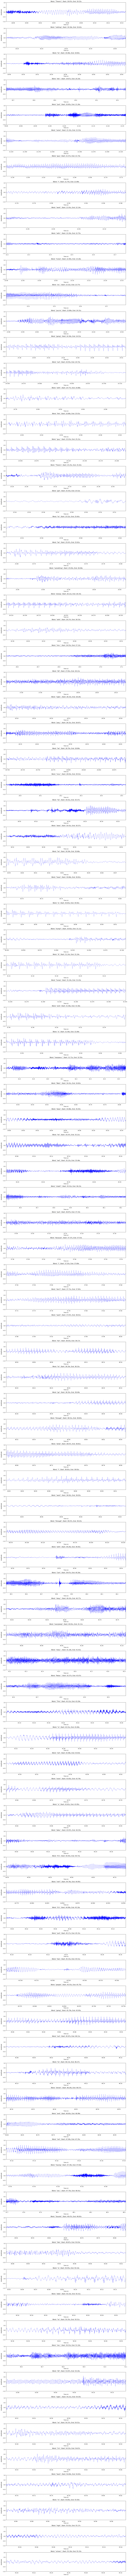

In [21]:
import os
import json
import librosa
import matplotlib.pyplot as plt
import numpy as np

# Function to segment the audio based on the transcript
def segment_audio_based_on_transcript(audio_file, json_file, max_words=100):
    # Load the audio file
    y, sr = librosa.load(audio_file, sr=None)
    
    # Initialize a list to store audio segments
    audio_segments = []

    # Counter to limit the number of words
    word_count = 0

    # Load the JSON file
    with open(json_file, 'r') as file:
        data = json.load(file)
        # Extract the transcript from the JSON
        for result in data['results']['channels'][0]['alternatives']:
            for word_info in result['words']:
                if word_count >= max_words:
                    break
                word = word_info['word']
                start_time = word_info['start']
                end_time = word_info['end']
                # Convert timestamps to samples
                start_sample = int(start_time * sr)
                end_sample = int(end_time * sr)
                # Extract audio segment
                segment = y[start_sample:end_sample]
                # Store the audio segment in the list
                audio_segments.append((word, start_time, end_time, segment))
                word_count += 1
                if word_count >= max_words:
                    break
            if word_count >= max_words:
                break
    
    return audio_segments

# Define the directories containing the JSON files and the audio file
json_dir = "/home/katia/Documents/BrainHack/BrainHack_projects/data/json/json_aa/json_aa"
audio_dir = "/home/katia/Documents/BrainHack/BrainHack_projects/data/audio"
json_file = os.path.join(json_dir, "friends_s01e01a_aa.json")
audio_file = os.path.join(audio_dir, "friends_s01e01a_audio.wav")

# Segment the audio based on the transcript (first 100 words only)
audio_segments = segment_audio_based_on_transcript(audio_file,json_file, max_words=100)

# Plot each segment with the word and timestamps
fig, axes = plt.subplots(len(audio_segments), 1, figsize=(15, 3*len(audio_segments)), squeeze=False)

for i, (word, start_time, end_time, segment) in enumerate(audio_segments):
    t = np.linspace(start_time, end_time, len(segment))
    axes[i, 0].plot(t, segment, 'b-', linewidth=0.5)
    axes[i, 0].set_xlabel('Time (s)')
    axes[i, 0].set_ylabel('Amplitude')
    axes[i, 0].set_title(f'Word: "{word}", Start: {start_time:.2f}s, End: {end_time:.2f}s')
    axes[i, 0].set_xlim([start_time, end_time])
    axes[i, 0].set_ylim([-1, 1])

plt.tight_layout()
plt.show()


5. Transcribe Audio with AssemblyAI

This section demonstrates how to use AssemblyAI to transcribe an audio file. The transcription includes speaker labels, sentiment analysis, entity detection, and IAB categories.

In [22]:
import assemblyai as aai

# API key
aai.settings.api_key = "c52b0e5efa6a41cabab766bf87419e2e"

# URL of the file to transcribe
FILE_URL = "https://assemblyaiusercontent.com/playground/4jigmcKoY4o.mp3"

# Configure transcription parameters
config = aai.TranscriptionConfig(
    speech_model=aai.SpeechModel.best,
    iab_categories=True,
    sentiment_analysis=True,
    entity_detection=True,
    speaker_labels=True,
    language_code="en_us"
)

# Create transcriber instance with the provided configuration
transcriber = aai.Transcriber(config=config)

# Transcribe the audio file
transcript = transcriber.transcribe(FILE_URL)

# Check the transcription status and print results
if transcript.status == aai.TranscriptStatus.error:
    print(f"Error: {transcript.error}")
else:
    # Print the transcription text with speaker labels if available
    if hasattr(transcript, 'utterances') and transcript.utterances:
        print("Transcription with Speaker Labels:")
        for utterance in transcript.utterances:
            speaker = utterance.speaker
            text = utterance.text
            print(f"Speaker {speaker}: {text}")
    else:
        print("Transcription:")
        print(transcript.text)
    
    # Print the detected entities
    if hasattr(transcript, 'entities') and transcript.entities:
        print("\nEntities Detected:")
        for entity in transcript.entities:
            print(f"Type: {entity.entity_type}, Text: {entity.text}")


Transcription with Speaker Labels:
Speaker A: There's nothing to tell. It's just some guy I work with.
Speaker B: Come on. You're going out with the guy? There's got to be something wrong with him.
Speaker C: All right, Joey, be nice. So, does he have a hump? A hump and a hairpiece.
Speaker D: Wait, does he eat chalk? Just cause I don't want her to go through what I went through with Carl.
Speaker A: Oh, okay, everybody relax. Relax? This is not even a date. It's not? It's just two people going out to dinner and not having sex.
Speaker C: Sounds like a date to me. All right, so I'm back in high school. I'm standing in the middle of the cafeteria, and I realize I am totally naked. Then I look down, and I realize there is a phone there.
Speaker B: Instead of.
Speaker C: That's right. All of a sudden, the phone starts to ring. Now I don't know what to do. Everybody starts looking at me.
Speaker A: They weren't looking at you before?
Speaker C: Finally, I figure I'd better answer it turns 

**6. Perform Sentiment Analysis on Transcripts**

This section loads a transcript from a JSON file, splits it into sentences, and performs sentiment analysis on each sentence using a pre-trained BERT model.

In [23]:
import os
import json
from dotenv import load_dotenv
import torch
from transformers import pipeline, AutoTokenizer
from nltk.tokenize import sent_tokenize

# Load environment variables
load_dotenv()

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

# Set the maximum sequence length
max_seq_length = 512

# Define a new sentiment analysis pipeline with the specified maximum sequence length
sentiment_analysis = pipeline(
    "sentiment-analysis", 
    model="distilbert/distilbert-base-uncased-finetuned-sst-2-english", 
    tokenizer=tokenizer,
    device=0 if torch.cuda.is_available() else -1,  # Specify GPU if available
    framework="pt",
    max_length=max_seq_length,
    truncation=True  # Explicitly set truncation to True
)

# Set the path and file name
path = os.getenv('BRAINHACK_JSON_PATH', '/home/katia/Documents/BrainHack/BrainHack_projects/data/json/json_aa/json_aa')
file_name = 'friends_s01e01a_aa.json'

# Read the JSON file
with open(os.path.join(path, file_name), 'r') as file:
    data = json.load(file)

# Extract transcripts
transcripts = [channel['alternatives'][0]['transcript'] for channel in data['results']['channels']]

# Combine transcripts into a single text
text = ' '.join(transcripts)

# Split text into sentences
sentences = sent_tokenize(text)

# Perform sentiment analysis on each sentence
for sentence in sentences:
    # Perform sentiment analysis on the sentence
    result = sentiment_analysis(sentence)
    print(f"Sentence: '{sentence}'")
    print(f"Sentiment: {result[0]['label']}, Score: {result[0]['score']}")


Sentence: 'There's nothing to tell.'
Sentiment: NEGATIVE, Score: 0.9991669654846191
Sentence: 'Just some guy I work with.'
Sentiment: POSITIVE, Score: 0.9709184169769287
Sentence: 'Come on, you're going out with the guy.'
Sentiment: POSITIVE, Score: 0.9983578324317932
Sentence: 'There's got to be something wrong with him.'
Sentiment: NEGATIVE, Score: 0.9969286322593689
Sentence: 'All right, joey, be nice.'
Sentiment: POSITIVE, Score: 0.9997671246528625
Sentence: 'So does he have a hump?'
Sentiment: NEGATIVE, Score: 0.9930300116539001
Sentence: 'A hump and a hairpiece.'
Sentiment: NEGATIVE, Score: 0.782961368560791
Sentence: 'Wait, does he eat chalk?'
Sentiment: NEGATIVE, Score: 0.9989175796508789
Sentence: 'Just because I don't want her to go through what I went through with Carl okay, everybody relax.'
Sentiment: POSITIVE, Score: 0.9936161041259766
Sentence: 'Relax.'
Sentiment: POSITIVE, Score: 0.997666597366333
Sentence: 'This is not even a date.'
Sentiment: NEGATIVE, Score: 0.999011

**7- Setting Up Environment for Data Analysis and Visualization**

This Python script provides a template for setting up an environment conducive to data analysis and visualization. It includes configurations to suppress warnings, clear the font cache, rebuild the font cache, and set display formats for high-quality rendering. This setup is particularly useful for projects involving data analysis, sentiment analysis, and generating visualizations using Pandas, Matplotlib, TextBlob, and SQLite. It ensures a smooth workflow by optimizing font handling and enhancing display quality for visualizations.

In [24]:
import os
import pandas as pd
import re
from textblob import TextBlob
import sqlite3
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Clear the font cache manually (if necessary)
font_cache_dir = os.path.join(matplotlib.get_cachedir(), 'fontlist-v330.json')
if os.path.exists(font_cache_dir):
    os.remove(font_cache_dir)

# Rebuild the font cache using findSystemFonts and findfont
import matplotlib.font_manager as fm
fm.findSystemFonts(fontpaths=None, fontext='ttf')
fm.findfont('serif')

# Set display format for IPython
set_matplotlib_formats('retina', quality=100)


**8- Parsing "Friends" TV Show Scripts Dataset**

This script parses scripts from the "Friends" TV show dataset. The dataset contains text files representing the dialogue from different episodes of the show. The script iterates through each file, extracts the season and episode information from the filename, and then processes each line of dialogue to extract the character and speech content. It creates a DataFrame from the collected data, with columns for season, episode, character, and dialogue. This parsed data can be used for further analysis, such as sentiment analysis, character interaction patterns, or generating insights about the show's dialogue dynamics.

In [25]:
import os
import pandas as pd
import re

# Set the base URL
BASE_URL = '../../data/friends-sitcom-data-analysis-master/dataset/'

master_array = []

# Get the list of files and sort them
files = sorted([f for f in os.listdir(BASE_URL) if f.endswith('.txt')])

# Debug information
print("Total number of files:", len(files))
print("First 5 files:", files[:5])
print("Last 5 files:", files[-5:])

# Iterate through each file in the directory
for filename in files:
    # Construct the full file path
    full_path = os.path.join(BASE_URL, filename)
    
    # Obtain the season and episode from the filename
    split_name = filename.split('.')
    season = split_name[0]
    episode = split_name[1]
    
    # Open the file
    with open(full_path, "r", encoding='utf-8') as f:
        # Read the script file
        script = f.read()
        
        # Split the script into lines
        lines = script.split('\n')
        
        # Process each line of the script
        for line in lines:
            # Check if the line contains a colon to split character and speech
            if ':' in line:
                character, speech = line.split(':', 1)
                # Filter out non-dialogue lines
                if character.strip().lower() not in [
                    'written by', 'transcribed by', 'additional transcribing by', 
                    'note', '[scene', '[tag scene'
                ]:
                    master_array.append([season, episode, character.strip(), speech.strip()])

# Create a DataFrame from the master_array
df = pd.DataFrame(master_array, columns=['season', 'episode', 'character', 'speech'])

# Display some debug information about the DataFrame
print("DataFrame shape:", df.shape)
print("Unique seasons in DataFrame:", sorted(df['season'].unique()))
print("Unique episodes in each season:")
for season in sorted(df['season'].unique()):
    print(f"Season {season}: {sorted(df[df['season'] == season]['episode'].unique())}")

# Display the first few rows of the DataFrame
df.head()


Total number of files: 227
First 5 files: ['1.1.txt', '1.10.txt', '1.11.txt', '1.12.txt', '1.13.txt']
Last 5 files: ['9.5.txt', '9.6.txt', '9.7.txt', '9.8.txt', '9.9.txt']
DataFrame shape: (61762, 4)
Unique seasons in DataFrame: ['1', '10', '2', '3', '4', '5', '6', '7', '8', '9']
Unique episodes in each season:
Season 1: ['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '3', '4', '5', '6', '7', '8', '9']
Season 10: ['1', '10', '11', '12', '13', '14', '15', '16', '17', '2', '3', '4', '5', '6', '7', '8', '9']
Season 2: ['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '3', '4', '5', '6', '7', '8', '9']
Season 3: ['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '3', '4', '5', '6', '7', '8', '9']
Season 4: ['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '3', '4', '5', '6', '7', '8', '9']
Seas

season episode character                                             speech
0      1       1     (Note  The previously unseen parts of this episode ar...
1      1       1    Monica        There's nothing to tell! He's just some guy
2      1       1      Joey      C'mon, you're going out with the guy! There's
3      1       1  Chandler                                 All right Joey, be
4      1       1    Phoebe                           Wait, does he eat chalk?

**a pandas DataFrame df from a 2D array master_array, specifying the column names as 'season', 'episode', 'char', and 'line'.**

In [26]:
df = pd.DataFrame(master_array, columns=['season', 'episode', 'char', 'line'])
df


season episode      char  \
0          1       1     (Note   
1          1       1    Monica   
2          1       1      Joey   
3          1       1  Chandler   
4          1       1    Phoebe   
...      ...     ...       ...   
61757      9       9      ROSS   
61758      9       9      ROSS   
61759      9       9      MIKE   
61760      9       9    PHOEBE   
61761      9       9      MIKE   

                                                    line  
0      The previously unseen parts of this episode ar...  
1            There's nothing to tell! He's just some guy  
2          C'mon, you're going out with the guy! There's  
3                                     All right Joey, be  
4                               Wait, does he eat chalk?  
...                                                  ...  
61757  (pauses, then crunches up the note and stuffs ...  
61758                          Hey you guys.� (He sits.)  
61759                                               Hey.  
61760  Hey.� I'll be right back.� I've got to go to t...  
61761           (finally) Stout.� That's a kind of beer.  

[61762 rows x 4 columns]

**finds the unique values in the 'char' column of the DataFrame df, and then selects the elements from index 20 to index 29 (inclusive).**

In [27]:
df['char'].unique()[20:30]

array(['to me this time of year. (Shakes bell as an introduction) (Sung',
       'Max', 'David', 'Janice', 'Sandy', 'Fun Bobby', 'Dick Clark',
       'Guy', 'Monica and Phoebe', 'Jay Leno'], dtype=object)

**replaces specific values in the 'character' column of the DataFrame df with standardized versions. For example, it replaces variations of character names like 'Chandler', 'Joey', 'Monica', etc., with consistent versions like 'Chandler', 'Joey', 'Monica', etc.**

In [28]:
df['char'].replace({'Chandler':'Chandler','CHANDLER':'Chandler', 'Chandlers':'Chandler', 'chandler': 'Chandler',
                    'Joey':'Joey', 'JOEY': 'Joey',
                    'Monica':'Monica','MONICA':'Monica', 'MOnica': 'Monica', 'MNCA': 'Monica',
                    'Phoebe':'Phoebe','PHOEBE':'Phoebe', 'Pheebs':'Phoebe', 'Pheebs':'Phoebe',
                    'Rachel':'Rachel','RACHEL':'Rachel', 'RACH':'Rachel', 'RAHCEL':'Rachel', 'Racel':'Rachel', 'Rache':'Rachel',
                    'Ross':'Ross', 'RUSS':'Ross', 'ROSS': 'Ross'}, inplace=True)


**defines a list called character containing the standardized character names + filters the DataFrame df to keep only the rows where the 'character' column contains values present in the character list.**

In [29]:
char = ['Chandler', 'Joey', 'Monica', 'Phoebe', 'Rachel', 'Ross']
df = df[df['char'].isin(char)]

In [30]:
df

season episode      char  \
1          1       1    Monica   
2          1       1      Joey   
3          1       1  Chandler   
4          1       1    Phoebe   
5          1       1    Phoebe   
...      ...     ...       ...   
61755      9       9      Ross   
61756      9       9    Rachel   
61757      9       9      Ross   
61758      9       9      Ross   
61760      9       9    Phoebe   

                                                    line  
1            There's nothing to tell! He's just some guy  
2          C'mon, you're going out with the guy! There's  
3                                     All right Joey, be  
4                               Wait, does he eat chalk?  
5           Just, 'cause, I don't want her to go through  
...                                                  ...  
61755                   (holds up the message) Uh, Rach.  
61756                      (still looking at Emma) Yeah?  
61757  (pauses, then crunches up the note and stuffs ...  
61758                          Hey you guys.� (He sits.)  
61760  Hey.� I'll be right back.� I've got to go to t...  

[50615 rows x 4 columns]

**calculates sentiment scores for each line of speech in the DataFrame df using TextBlob's sentiment analysis, and stores the polarity scores in a new column called 'sentiment'.**

In [31]:
df['sentiment'] = df['line'].apply(lambda x: TextBlob(x).sentiment[0])

**converts the 'season' column of the DataFrame df to integers + converts the 'episode' column of the DataFrame df to integers.**

In [32]:
df['season'] = df['season'].apply(lambda x: int(x))
df['episode'] = df['episode'].apply(lambda x: int(x))

**executes an SQL command to create a table named 'Friends' in the SQLite database if it does not already exist. It defines the columns 'season', 'episode', 'char', 'line', and 'sentiment' along with their data types.**

In [33]:
conn = sqlite3.connect('friends_script.db') #connect to the database
cur = conn.cursor()
cur.execute('CREATE TABLE IF NOT EXISTS Friends(season number, episode number, char text, line text, sentiment integer)')
conn.commit()

**writes the DataFrame df into the 'Friends' table of the SQLite database. If the table already exists, it replaces it + parameter specifies that the DataFrame index should not be written to the database.**

In [34]:
df.to_sql('Friends', conn, if_exists='replace', index=False) # save into the 'lines' table

50615

In [35]:
COLORS=['#40E0D0', '#4682B4', '#708090', '#90EE90', '#FFDEAD', '#E9967A']

**9-The most popular character**

In [36]:
cur.execute("SELECT char, COUNT(line) AS 'spoken_lines' FROM Friends GROUP BY char ORDER BY spoken_lines DESC")
most_lines = [c for c in cur.fetchall()]


In [37]:
print(most_lines)


[('Rachel', 9249), ('Ross', 9070), ('Monica', 8380), ('Chandler', 8353), ('Joey', 8169), ('Phoebe', 7394)]


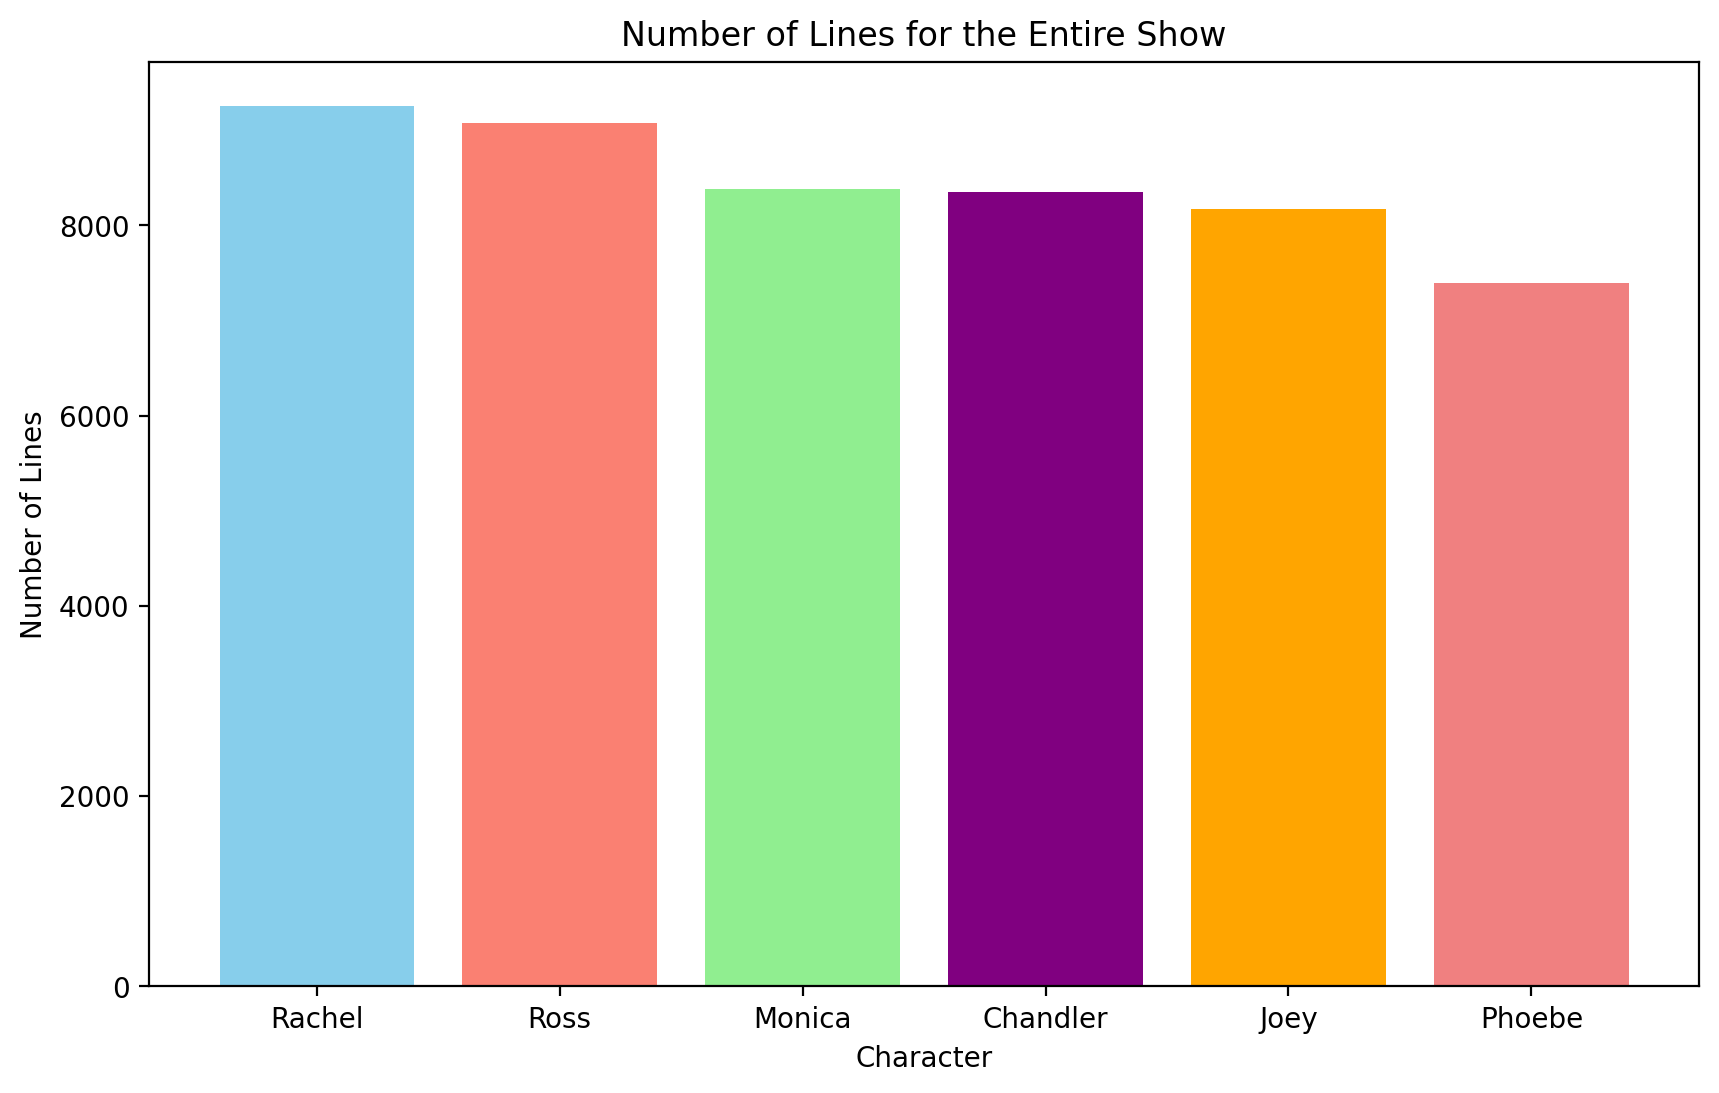

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt

# Define your data
most_lines = [('Rachel', 9249), ('Ross', 9070), ('Monica', 8380), ('Chandler', 8353), ('Joey', 8169), ('Phoebe', 7394)]

# Extracting data for plotting
characters = [line[0] for line in most_lines]
lines_count = [line[1] for line in most_lines]

# Define colors for each character
colors = ['skyblue', 'salmon', 'lightgreen', 'purple', 'orange', 'lightcoral']

# Create the bar plot with custom colors
plt.figure(figsize=(10, 6))
plt.bar(characters, lines_count, color=colors)

# Add labels and title
plt.xlabel('Character')
plt.ylabel('Number of Lines')
plt.title('Number of Lines for the Entire Show')

# Show plot
plt.show()


**10-Number of lines per season**

In [39]:
cur.execute("""
SELECT char, season, count(line) AS total_lines FROM Friends 
WHERE char IN ('Rachel', 'Ross', 'Monica','Chandler','Joey', 'Phoebe') GROUP BY season, char""")
lines_per_season = [c for c in cur.fetchall()]

In [42]:
lines_dict = {}
for lines in lines_per_season:
    char = lines[0]
    season = lines[1]
    total_lines = lines[2]
    
    if char in lines_dict:
        # append the new number to the existing array at this slot
        lines_dict[char][season] = total_lines
    else:
        # create a new array in this slot
        lines_dict[char] = {
            season: total_lines
        }

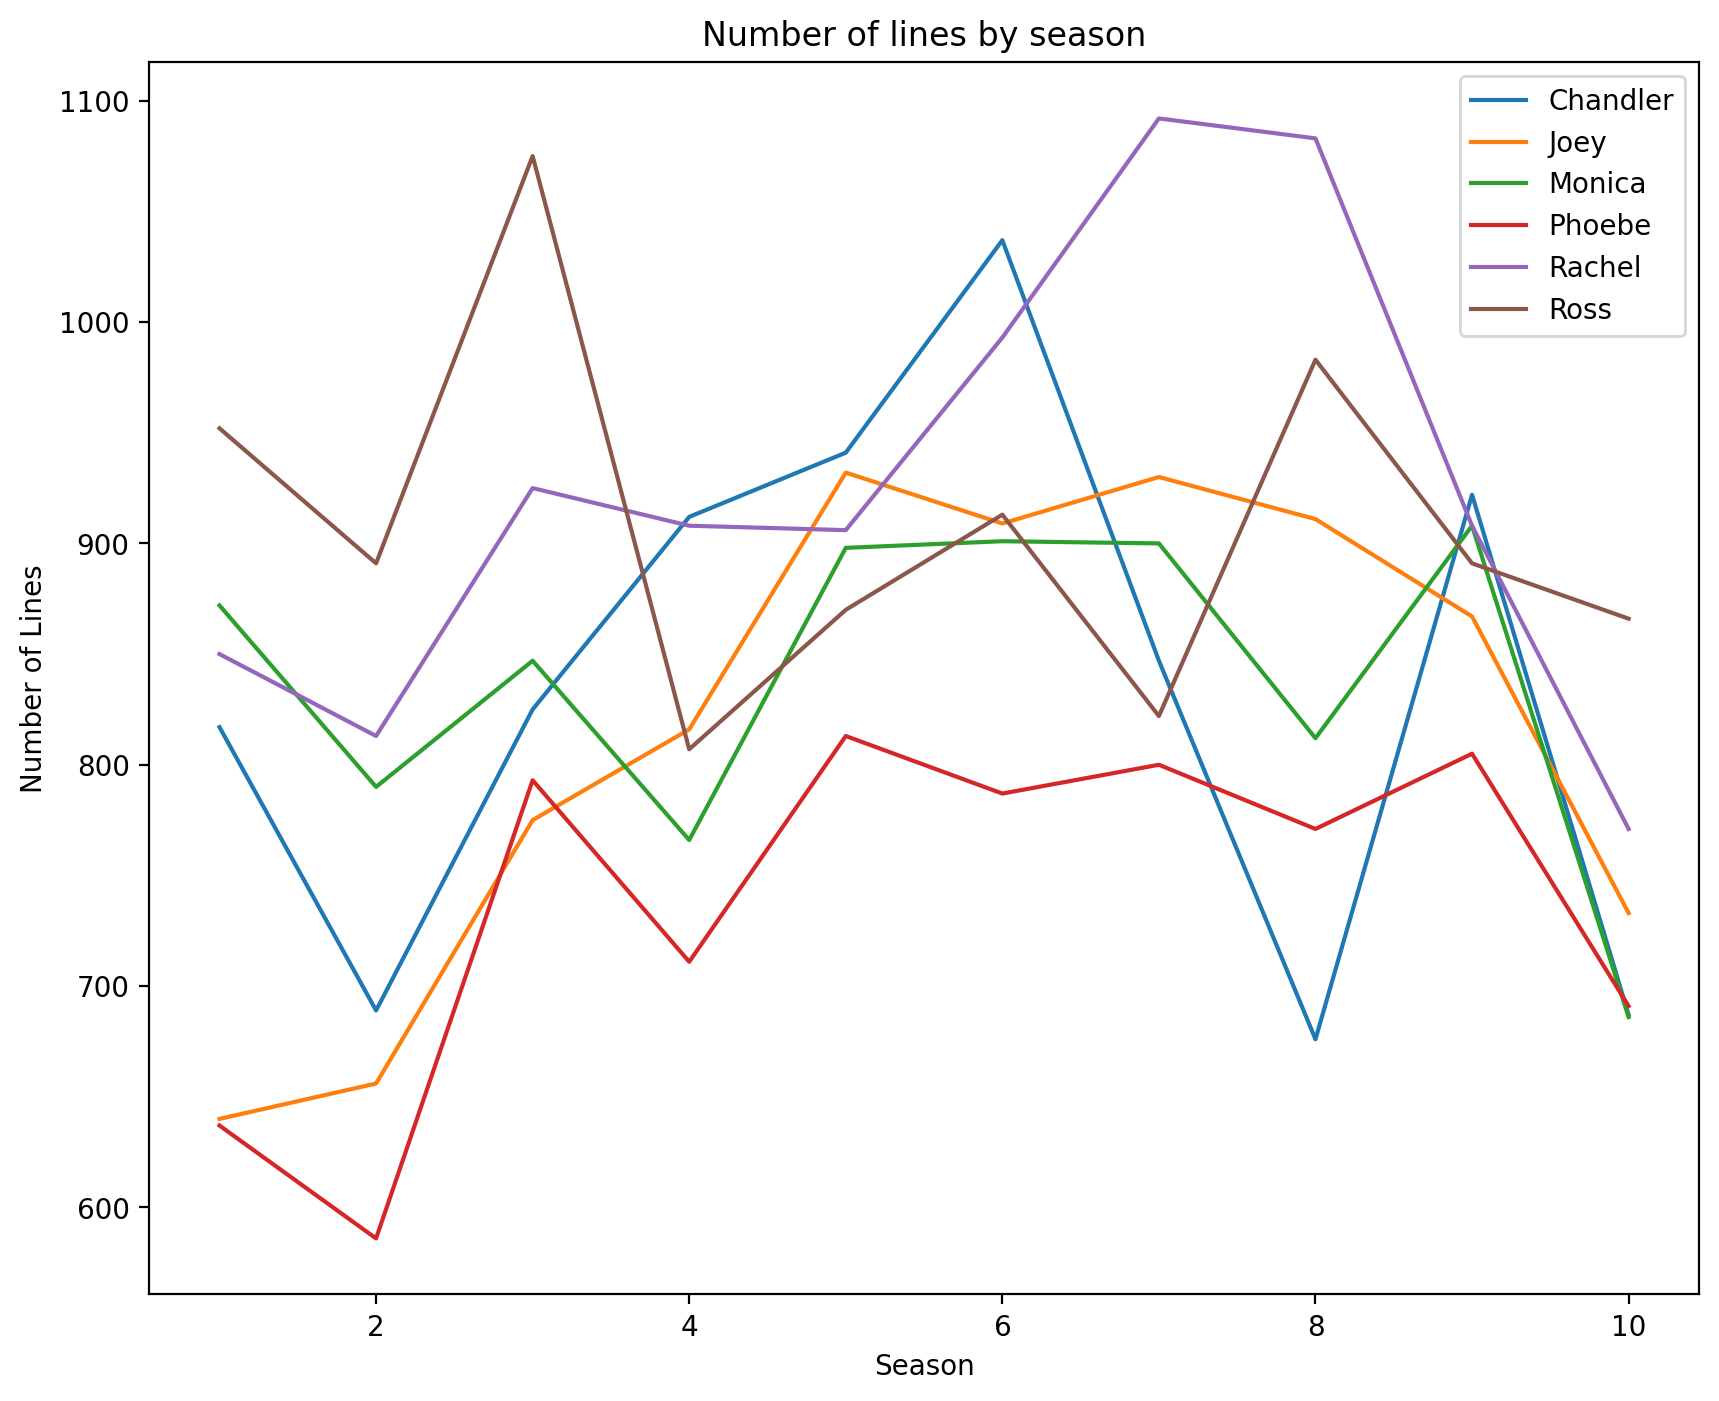

In [43]:


fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (10, 8)
for char in lines_dict.keys():
    x1 = lines_dict[char].keys()
    y1 = lines_dict[char].values()
    plt.plot(x1, y1, label = char)
    
plt.xlabel('Season')
plt.ylabel('Number of Lines')
plt.title('Number of lines by season')
plt.legend(loc=1)
plt.show()



**11-Most Spoken About**


In [44]:
nicknames = [['Rachel', 'Rach'], 
             ['Ross', 'Ross-A-Tron', 'Professor Geller'], 
             ['Monica', 'Mon'],
             ['Chandler', 'Chan'],
             ['Joey', 'Joe'], 
             ['Phoebe', 'Phoebes']]

In [45]:
all_lines = pd.read_sql("SELECT line FROM Friends", conn)

In [46]:
char_mention = [] 

for name_list in nicknames:    # loop for each character
    mention_counter = 0        # keep track of the mentions
    for name in name_list:     # loop for each nickname
        mentions = all_lines['line'].str.count(name).sum()
        mention_counter += mentions
    char_mention.append([name_list[0], mention_counter]) #append the name and mention count

In [47]:
char_mention = sorted(char_mention, key=lambda x: x[1], reverse=True)


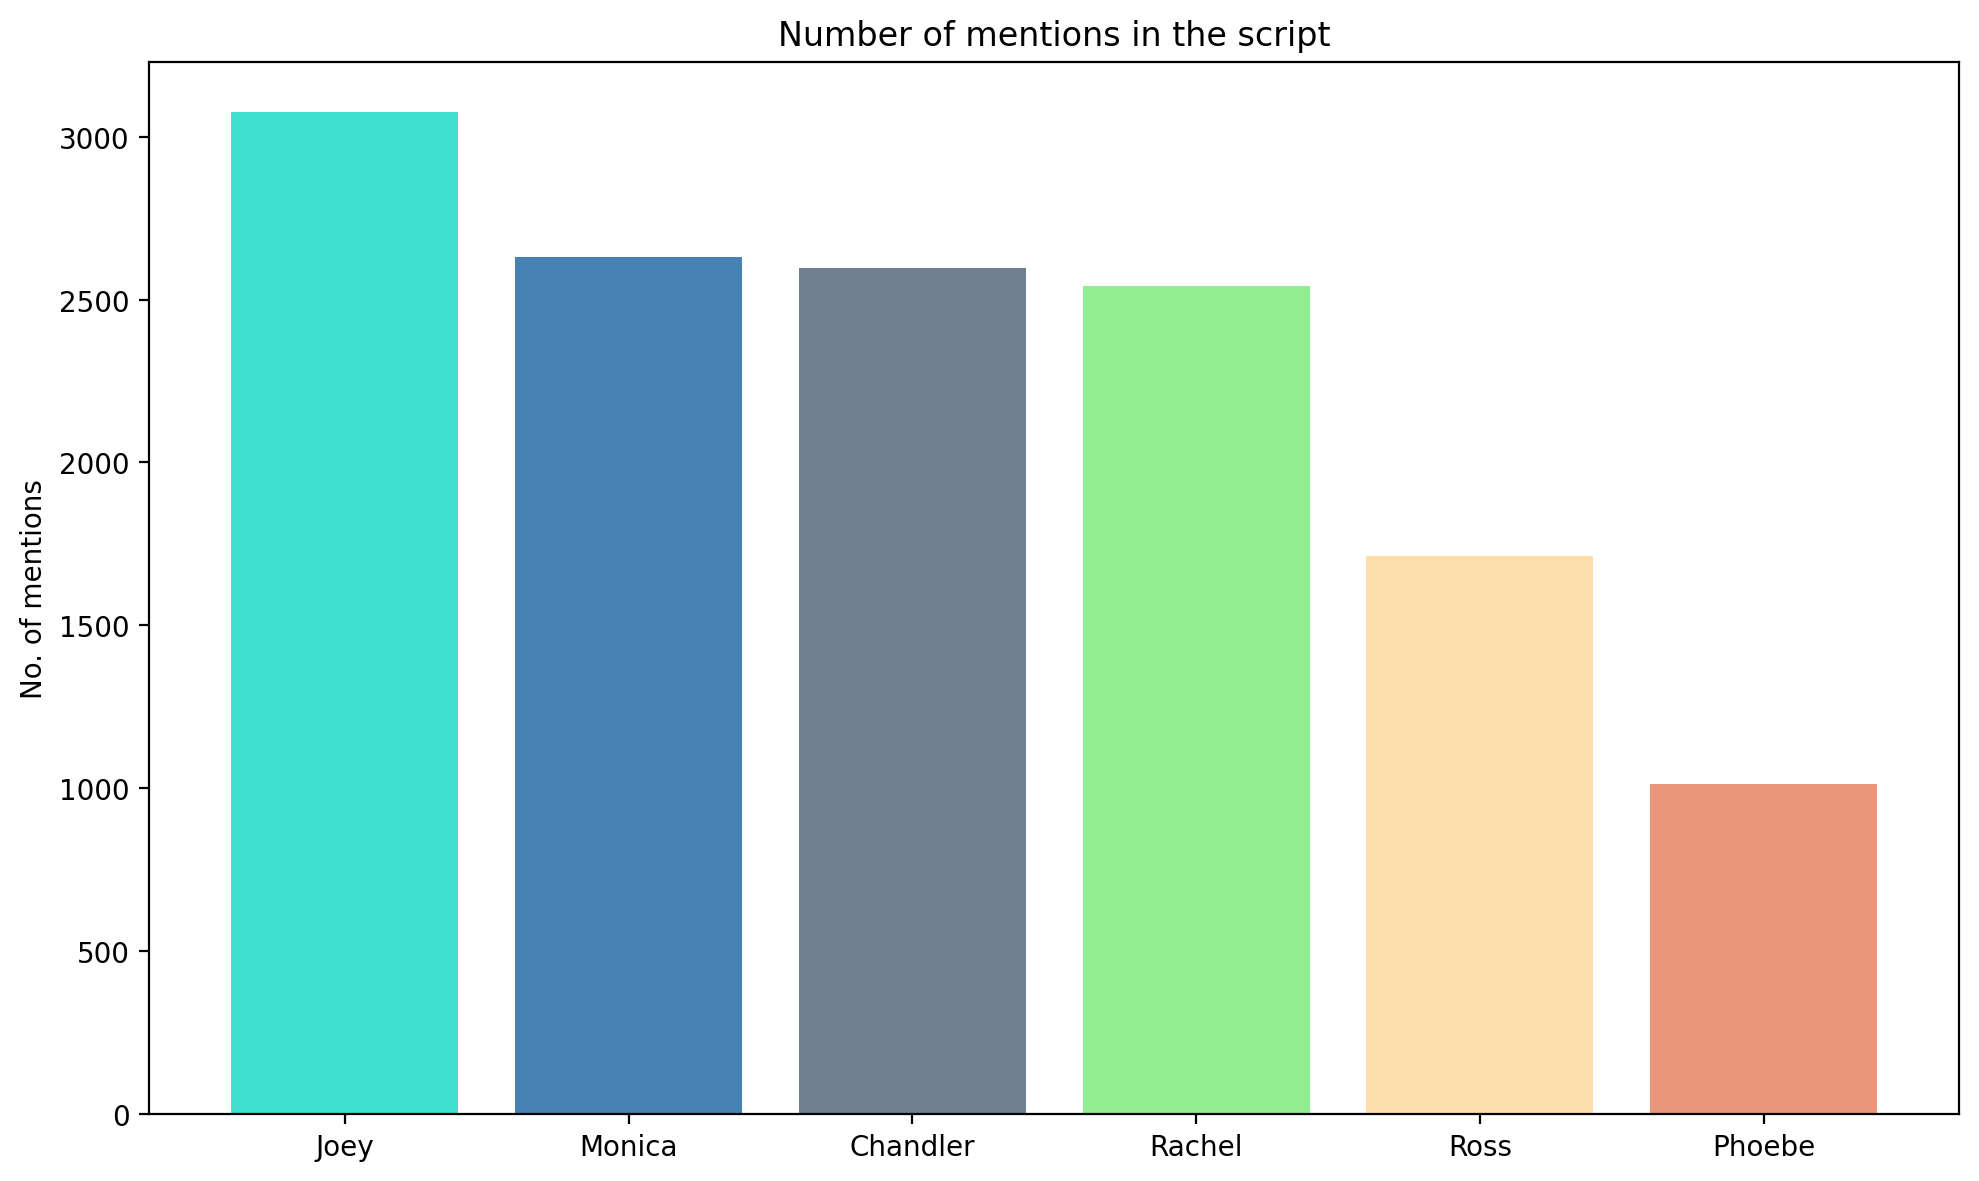

In [48]:
plt.rcParams['figure.figsize'] = (10, 6)
fig, ax = plt.subplots()
plt.bar(
    x=[mention[0] for mention in char_mention],
    height=[mention[1] for mention in char_mention],
    color=COLORS
)
plt.title('Number of mentions in the script')
plt.ylabel('No. of mentions')
fig.tight_layout()

**12-Largest Vocabulary**


In [50]:
# function to remove all non alphabetical characters keep spaces
def alphanumonly(text):
    '''Remove all non letters from string'''
    regex = re.compile('[^a-zA-Z ]')
    #First parameter is the replacement, second parameter is your input string
    return(regex.sub('', text))

In [51]:
cur.execute("SELECT char, line FROM Friends WHERE char IN ('Rachel', 'Ross', 'Monica','Chandler','Joey', 'Phoebe')")
lines_per_season = [c for c in cur.fetchall()]

In [53]:
monica_vocab = set()
chandler_vocab = set()
ross_vocab = set()
phoebe_vocab = set()
rachel_vocab = set()
joey_vocab = set()

for l in lines_per_season:
    char = l[0]
    l = alphanumonly(l[1]).strip()
    split_words = l.split(' ')
    for word in split_words:
        if char == 'Monica':
            monica_vocab.add(word)
            
        if char == 'Joey':
            joey_vocab.add(word)
        
        if char == 'Ross':
            ross_vocab.add(word)
        
        if char == 'Phoebe':
            phoebe_vocab.add(word)
        
        if char == 'Chandler':
            chandler_vocab.add(word)
        
        if char == 'Rachel':
            rachel_vocab.add(word)

char_vocal_length = ['Ross', 'Joey', 'Chandler', 'Rachel', 'Phoebe', 'Monica']
vocab_lengths = [len(ross_vocab), len(joey_vocab), len(chandler_vocab), len(rachel_vocab), len(phoebe_vocab), len(monica_vocab)]

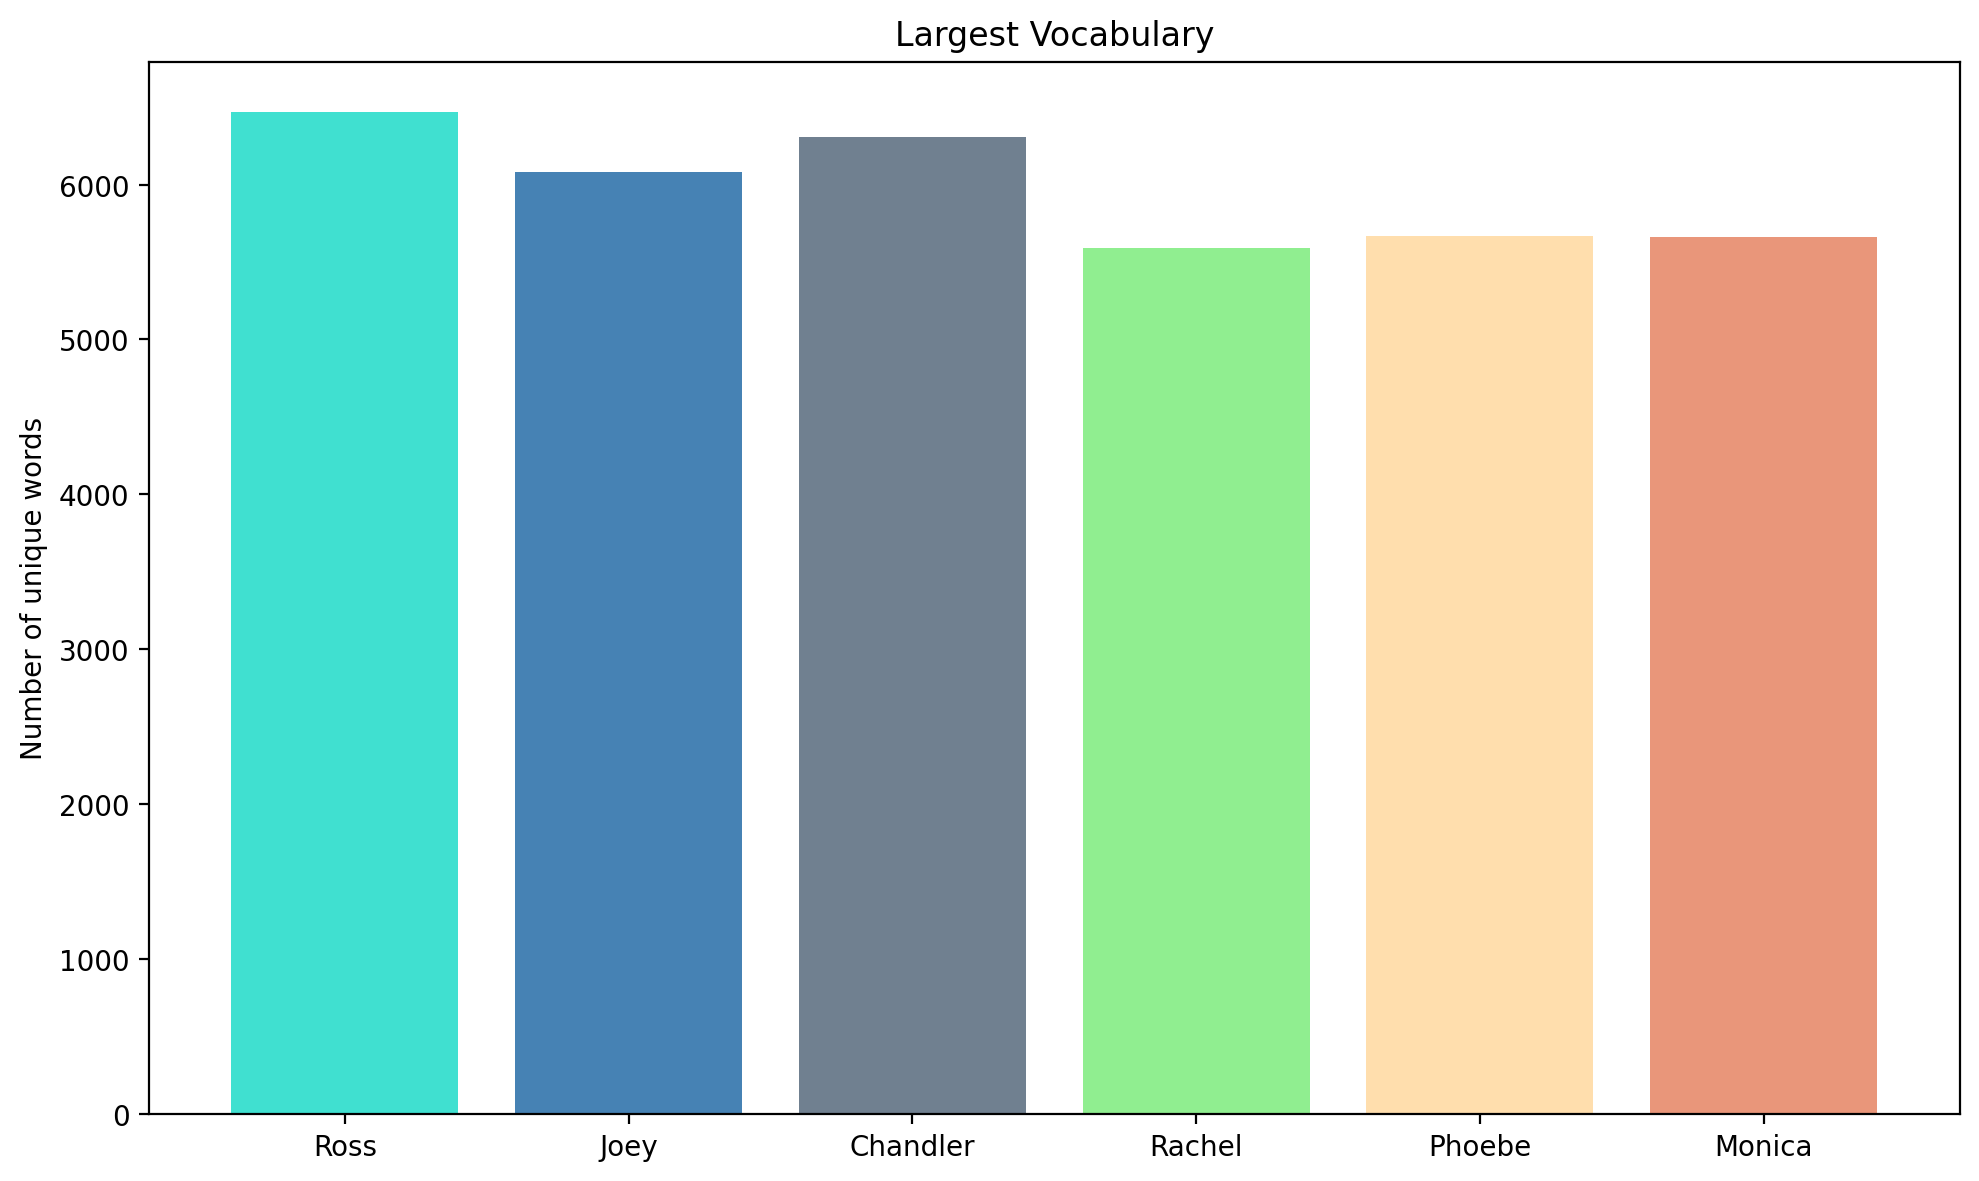

In [54]:


plt.rcParams['figure.figsize'] = (10, 6)
fig, ax = plt.subplots()
plt.bar(
    x=char_vocal_length,
    height=vocab_lengths,
    color=COLORS
)
plt.title('Largest Vocabulary')
plt.ylabel('Number of unique words')
fig.tight_layout()



**13-Ross and Rachel Sentiments throughout the season**

In [55]:
cur.execute("SELECT season, episode, sentiment FROM Friends WHERE char == 'Ross' ORDER BY season, episode")
ross_sentiments = [c for c in cur.fetchall()]

In [56]:
ross_sentiment = {}

for r in ross_sentiments:
    season_episode = f'S{r[0]}E{r[1]}'
    if r[0] == 10:
        season_episode = f'STENE{r[1]}'
    sentiment = r[2]
    if season_episode in ross_sentiment:
        ross_sentiment[season_episode] += sentiment
    else:
        ross_sentiment[season_episode] = sentiment

In [58]:
plt.rcParams['figure.figsize'] = (14, 5)

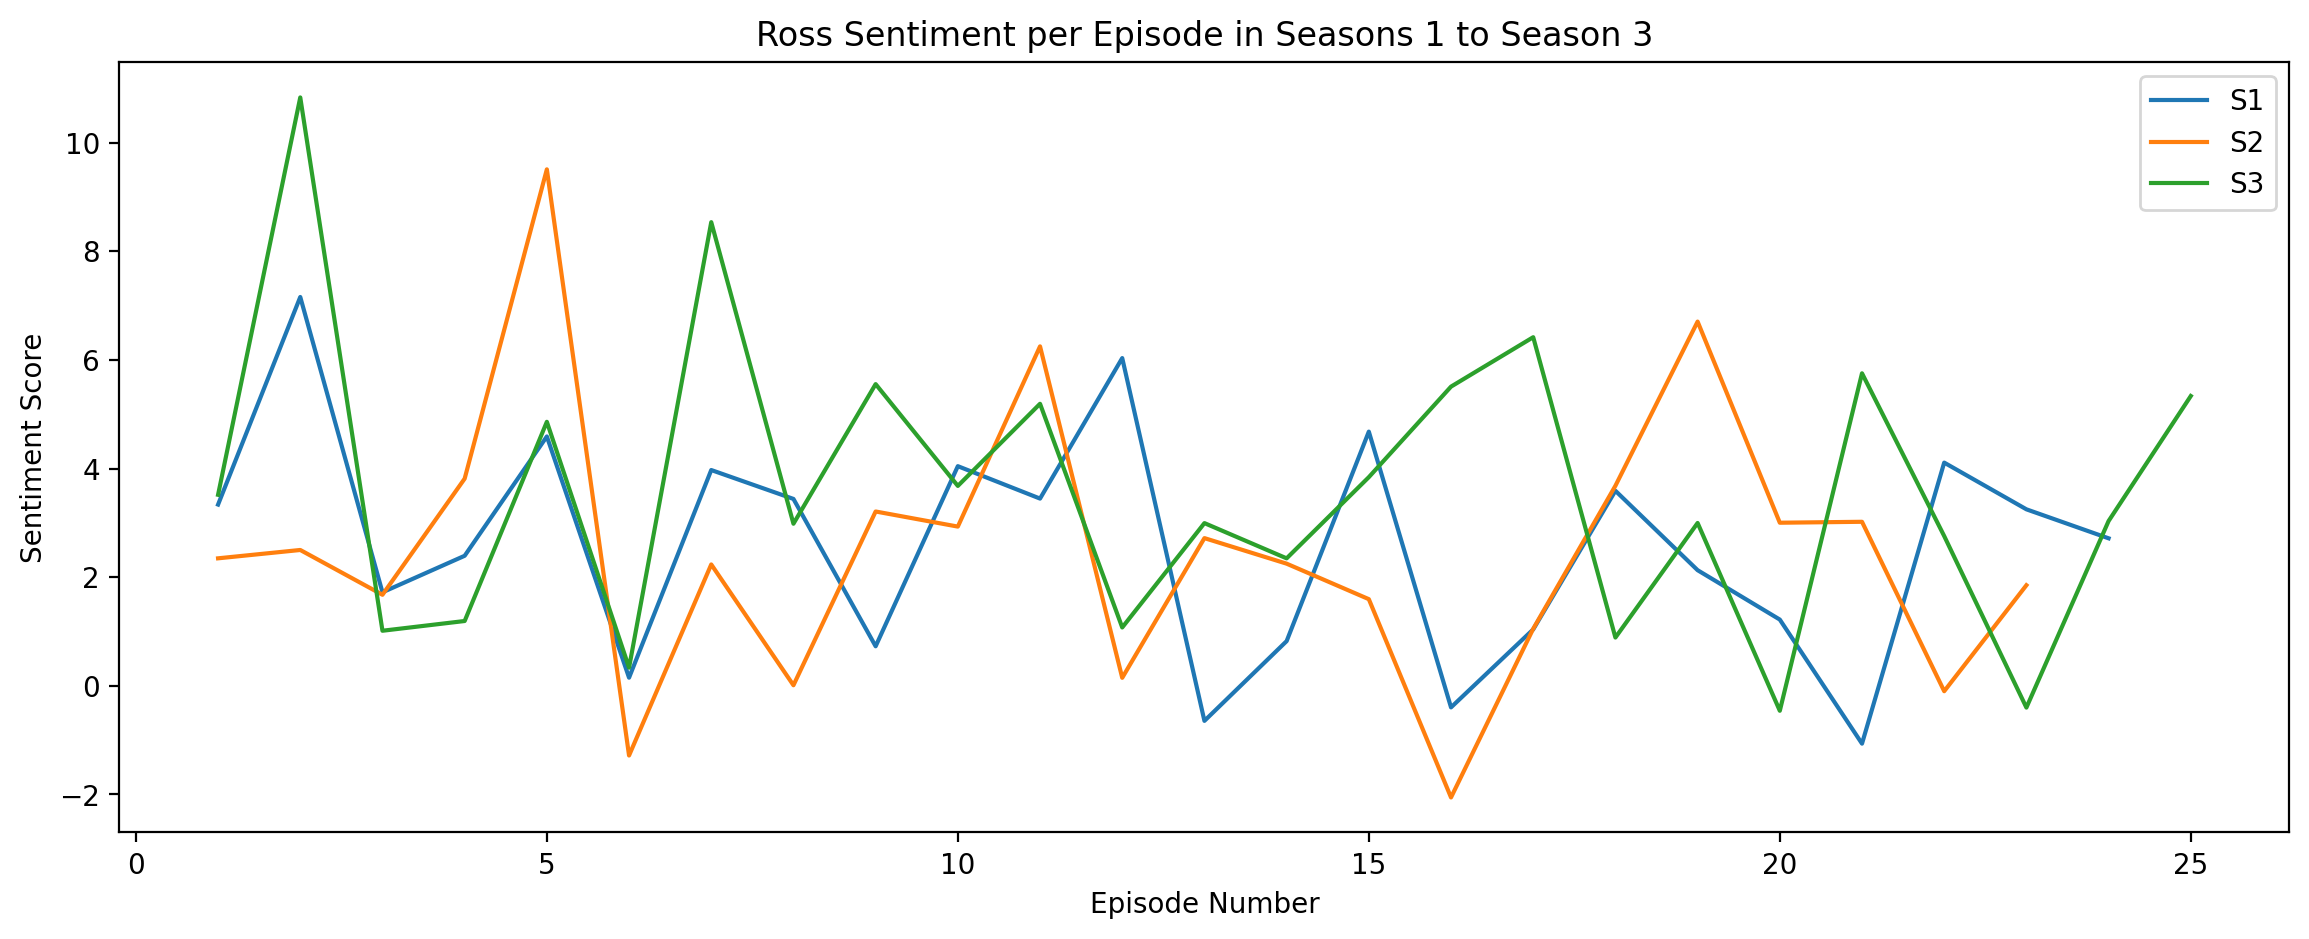

In [59]:
seasons = ['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'STEN']
for season in seasons[0:3]:
    sentiments = list(filter(lambda item: item[0].startswith(season), ross_sentiment.items())) 
    x1 = list(range(1, len(sentiments)+1))
    y1 = [x[1] for x in sentiments]
    plt.plot(x1, y1, label = season)
    
plt.xlabel('Episode Number')
plt.ylabel('Sentiment Score')
plt.title('Ross Sentiment per Episode in Seasons 1 to Season 3')
plt.legend(loc=1)
plt.show()

**14-Frequency of Interaction:** Look for patterns in how often individuals communicate with each other. More frequent interactions might indicate a closer relationship.

In [70]:
# Calculate the frequency of interaction between characters
interaction_frequency = df.groupby(['char']).size().reset_index(name='interaction_count')
print("Frequency of Interaction:")
print(interaction_frequency)


Frequency of Interaction:
       char  interaction_count
0  Chandler               8353
1      Joey               8169
2    Monica               8380
3    Phoebe               7394
4    Rachel               9249
5      Ross               9070


**15-Shared Vocabulary:** Analyze the vocabulary used by individuals and identify common terms or phrases they share. Similar linguistic styles and vocabulary could suggest closeness.

In [127]:
# Calculate the percentage of shared vocabulary
percentages = []
for idx, row in result_df.iterrows():
    char1 = row['Character 1']
    char2 = row['Character 2']
    shared_terms = row['Shared Vocabulary']
    
    # Total unique terms for each character
    total_terms_char1 = sum(shared_vocabulary[char1].values())
    total_terms_char2 = sum(shared_vocabulary[char2].values())
    
    # Calculate percentage
    percentage = (len(shared_terms) / min(total_terms_char1, total_terms_char2)) * 100
    percentages.append(percentage)

# Add percentages to DataFrame
result_df['Percentage'] = percentages

# Find the maximum percentage
max_percentage = result_df['Percentage'].max()

# Normalize percentages on a 100% scale
result_df['Percentage'] = (result_df['Percentage'] / max_percentage) * 100

# Display DataFrame with normalized percentages
print(result_df)


   Character 1 Character 2                                  Shared Vocabulary  \
0     Chandler        Joey  [All, right, Joey,, be, Sounds, like, a, date,...   
1     Chandler      Monica  [All, right, Joey,, be, Sounds, like, a, date,...   
2     Chandler      Phoebe  [All, right, Joey,, be, Sounds, like, a, date,...   
3     Chandler      Rachel  [All, right, Joey,, be, like, a, date, to, me....   
4     Chandler        Ross  [All, right, Joey,, be, Sounds, like, a, date,...   
5         Joey    Chandler  [C'mon,, you're, going, out, with, the, guy!, ...   
6         Joey      Monica  [C'mon,, you're, going, out, with, the, guy!, ...   
7         Joey      Phoebe  [C'mon,, you're, going, out, with, the, guy!, ...   
8         Joey      Rachel  [C'mon,, you're, going, out, with, the, guy!, ...   
9         Joey        Ross  [C'mon,, you're, going, out, with, the, guy!, ...   
10      Monica    Chandler  [There's, nothing, to, He's, just, some, guy, ...   
11      Monica        Joey  

**16-Emotional Expression:** Investigate the emotional content of interactions, including expressions of affection, support, empathy, or humor. Positive emotional expressions often correlate with closeness.

In [76]:
import pandas as pd
from textblob import TextBlob

# Perform sentiment analysis on the dialogue data
df['sentiment'] = df['line'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Filter dialogue with positive sentiment (threshold can be adjusted)
positive_dialogue = df[df['sentiment'] > 0]

# Display positive emotional expressions
positive_dialogue[['char', 'line']]


char                                               line
3      Chandler                                 All right Joey, be
6        Monica          Okay, everybody relax. This is not even a
8      Chandler           Alright, so I'm back in high school, I'm
12     Chandler                                      That's right.
20       Monica                             Are you okay, sweetie?
...         ...                                                ...
61739    Phoebe                            (pause) Well, good bye.
61740    Rachel                               That was fun Pheebs.
61751      Ross  Hello.� (listens)� Ah, no, she's not here righ...
61754    Rachel  Oh, it was so much fun.� It felt so good to be...
61760    Phoebe  Hey.� I'll be right back.� I've got to go to t...

[15726 rows x 2 columns]

**17-Reciprocity:** Examine whether interactions between individuals are reciprocal, meaning both parties contribute equally to the conversation. Balanced participation may indicate mutual closeness.

In [81]:
import pandas as pd

# Calculate the number of lines spoken by each character across all seasons
line_counts = df['char'].value_counts()

# Calculate the total number of lines spoken across all seasons
total_lines = line_counts.sum()

# Calculate the proportion of lines spoken by each character across all seasons
proportions = line_counts / total_lines

print("Number of lines spoken by each character across all seasons:")
print(line_counts)
print("\nTotal number of lines spoken across all seasons:", total_lines)
print("\nProportion of lines spoken by each character across all seasons:")
print(proportions)

# Determine if participation is balanced across all seasons
balanced_threshold = 0.5
if proportions.min() / proportions.max() > balanced_threshold:
    print("\nParticipation is balanced across all seasons.")
else:
    print("\nParticipation is not balanced across all seasons.")


Number of lines spoken by each character across all seasons:
char
Rachel      9249
Ross        9070
Monica      8380
Chandler    8353
Joey        8169
Phoebe      7394
Name: count, dtype: int64

Total number of lines spoken across all seasons: 50615

Proportion of lines spoken by each character across all seasons:
char
Rachel      0.182732
Ross        0.179196
Monica      0.165564
Chandler    0.165030
Joey        0.161395
Phoebe      0.146083
Name: count, dtype: float64

Participation is balanced across all seasons.


**18-Language Style Matching:** Assess the degree to which individuals match each other's linguistic style, including word choice, sentence structure, and conversational patterns. High levels of style matching may reflect closeness.

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import itertools

# Define a function to calculate language style matching between two individuals
def calculate_lsm(lines1, lines2):
    # Combine lines of dialogue into single documents for each individual
    doc1 = ' '.join(lines1)
    doc2 = ' '.join(lines2)
    
    # Vectorize the documents using TF-IDF representation
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform([doc1, doc2])
    
    # Calculate cosine similarity between the TF-IDF vectors
    similarity_matrix = cosine_similarity(tfidf_matrix)
    
    # Return the cosine similarity score
    return similarity_matrix[0, 1]

# Define a function to calculate language style matching for all pairs of individuals
def calculate_lsm_for_all_pairs(df):
    # Group lines of dialogue by character
    grouped_lines = df.groupby('char')['line'].apply(list).reset_index()
    
    # Generate all pairs of individuals
    pairs = list(itertools.combinations(grouped_lines['char'], 2))
    
    # Calculate language style matching for each pair
    lsm_scores = {}
    for pair in pairs:
        lines1 = grouped_lines[grouped_lines['char'] == pair[0]]['line'].iloc[0]
        lines2 = grouped_lines[grouped_lines['char'] == pair[1]]['line'].iloc[0]
        lsm_score = calculate_lsm(lines1, lines2)
        lsm_scores[f"{pair[0]} vs {pair[1]}"] = lsm_score
    
    return lsm_scores

# Calculate language style matching for all pairs of individuals
lsm_scores = calculate_lsm_for_all_pairs(df)

# Display language style matching scores
for pair, score in lsm_scores.items():
    print(f"{pair}: LSM Score = {score:.2f}")


Chandler vs Joey: LSM Score = 0.98
Chandler vs Monica: LSM Score = 0.99
Chandler vs Phoebe: LSM Score = 0.98
Chandler vs Rachel: LSM Score = 0.97
Chandler vs Ross: LSM Score = 0.99
Joey vs Monica: LSM Score = 0.97
Joey vs Phoebe: LSM Score = 0.97
Joey vs Rachel: LSM Score = 0.96
Joey vs Ross: LSM Score = 0.99
Monica vs Phoebe: LSM Score = 0.98
Monica vs Rachel: LSM Score = 0.98
Monica vs Ross: LSM Score = 0.98
Phoebe vs Rachel: LSM Score = 0.99
Phoebe vs Ross: LSM Score = 0.98
Rachel vs Ross: LSM Score = 0.97


This result could be due to various factors such as the consistent writing style of the show, similar speech patterns used by the characters, or shared vocabulary and expressions.

While it's not uncommon for characters in a TV show to have somewhat similar language styles, extremely high LSM scores across all pairs of characters could potentially indicate limited diversity or differentiation in the dialogue, which may not accurately reflect real-world interpersonal communication patterns.

**19-Turn-Taking and Interruptions:** Study the dynamics of turn-taking in conversations and instances of interruptions. Balanced turn-taking and minimal interruptions could signify a harmonious relationship.

In [91]:
import pandas as pd

# Sample DataFrame (replace this with your actual data)
data = {
    'char': ['Rachel', 'Ross', 'Monica', 'Chandler', 'Joey', 'Phoebe', 'Rachel', 'Monica', 'Rachel'],
    'line': ['Hi Ross!', 'Hey Rachel.', 'What are you doing?', 'Just hanging out.', 'Wanna grab a coffee?', 'Sure!', 'How was your day?', 'Busy as always.', 'Same here.'],
    'season': [1, 1, 1, 1, 1, 1, 2, 2, 2],
    'episode': [1, 1, 1, 1, 1, 1, 2, 2, 2]
}
df = pd.DataFrame(data)

# Function to calculate turn-taking and interruptions
def calculate_turn_taking_and_interruptions(df):
    turn_counts = {}
    interruptions = 0

    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        current_speaker = row['char']
        # Check for interruptions
        if index > 0:
            previous_speaker = df.loc[index - 1, 'char']
            if current_speaker != previous_speaker:
                interruptions += 1
        # Count turns for each character
        if current_speaker in turn_counts:
            turn_counts[current_speaker] += 1
        else:
            turn_counts[current_speaker] = 1

    return turn_counts, interruptions

# Calculate turn-taking and interruptions
turn_counts, interruptions = calculate_turn_taking_and_interruptions(df)

# Print the results
print("Turn Counts:")
for char, count in turn_counts.items():
    print(f"{char}: {count} turns")

print("\nInterruptions:", interruptions)


Turn Counts:
Rachel: 3 turns
Ross: 1 turns
Monica: 2 turns
Chandler: 1 turns
Joey: 1 turns
Phoebe: 1 turns

Interruptions: 8


**20-Topic Consistency:** Identify recurring topics or themes in conversations between individuals. Consistent engagement with shared interests or concerns may indicate closeness.

In [90]:
import pandas as pd
from collections import Counter

# Sample DataFrame (replace this with your actual data)
data = {
    'char': ['Rachel', 'Ross', 'Monica', 'Chandler', 'Joey', 'Phoebe'],
    'line': ['I love shopping!', 'How are you?', "Let's cook dinner.", 'Could you pass the remote?', 'How you doin?', 'I wrote a new song.']
}
df = pd.DataFrame(data)

# Function to extract keywords from text
def extract_keywords(text):
    # Split text into words and remove punctuation
    words = text.lower().split()
    # Define stopwords (words to ignore)
    stopwords = ['a', 'an', 'the', 'is', 'are', 'and', 'i', 'you', 'he', 'she', 'it', 'we', 'they', 'to', 'of', 'for', 'in', 'on', 'with']
    # Remove stopwords and count word frequencies
    word_counts = Counter(word for word in words if word not in stopwords)
    # Return the most common keywords
    return word_counts.most_common()

# Apply keyword extraction to each line of dialogue
df['keywords'] = df['line'].apply(extract_keywords)

# Display the DataFrame with extracted keywords
print(df[['char', 'line', 'keywords']])


       char                        line                               keywords
0    Rachel            I love shopping!            [(love, 1), (shopping!, 1)]
1      Ross                How are you?                  [(how, 1), (you?, 1)]
2    Monica          Let's cook dinner.  [(let's, 1), (cook, 1), (dinner., 1)]
3  Chandler  Could you pass the remote?  [(could, 1), (pass, 1), (remote?, 1)]
4      Joey               How you doin?                 [(how, 1), (doin?, 1)]
5    Phoebe         I wrote a new song.     [(wrote, 1), (new, 1), (song., 1)]


**21-Affiliative Language:** Look for the use of affiliative language, such as inclusive pronouns (e.g., "we," "us") and terms of endearment. Affiliative language signals a sense of belonging and closeness.

In [123]:
import json

def analyze_affiliative_language(data):
    inclusive_pronouns = ['we', 'us', 'our', 'ours', 'ourselves']
    terms_of_endearment = ['dear', 'darling', 'sweetheart', 'honey', 'babe', 'love', 'sweetie', 'baby']

    affiliative_count = 0

    # Split the data into individual turns
    turns = data.split('\n')

    # Iterate through each turn
    for turn in turns:
        # Split the turn into words
        words = turn.lower().split()

        # Check for inclusive pronouns
        for word in words:
            if word in inclusive_pronouns:
                affiliative_count += 1

        # Check for terms of endearment
        for word in words:
            if word in terms_of_endearment:
                affiliative_count += 1

    return affiliative_count

# Define the file path
file_path = "/home/katia/Documents/BrainHack/BrainHack_projects/data/json/json_aa/json_aa/friends_s01e01a_aa.json"

# Read the JSON file
with open(file_path, 'r') as file:
    data = file.read()

# Analyze affiliative language in the data
count = analyze_affiliative_language(data)
print("Affiliative language count:", count)


Affiliative language count: 15
